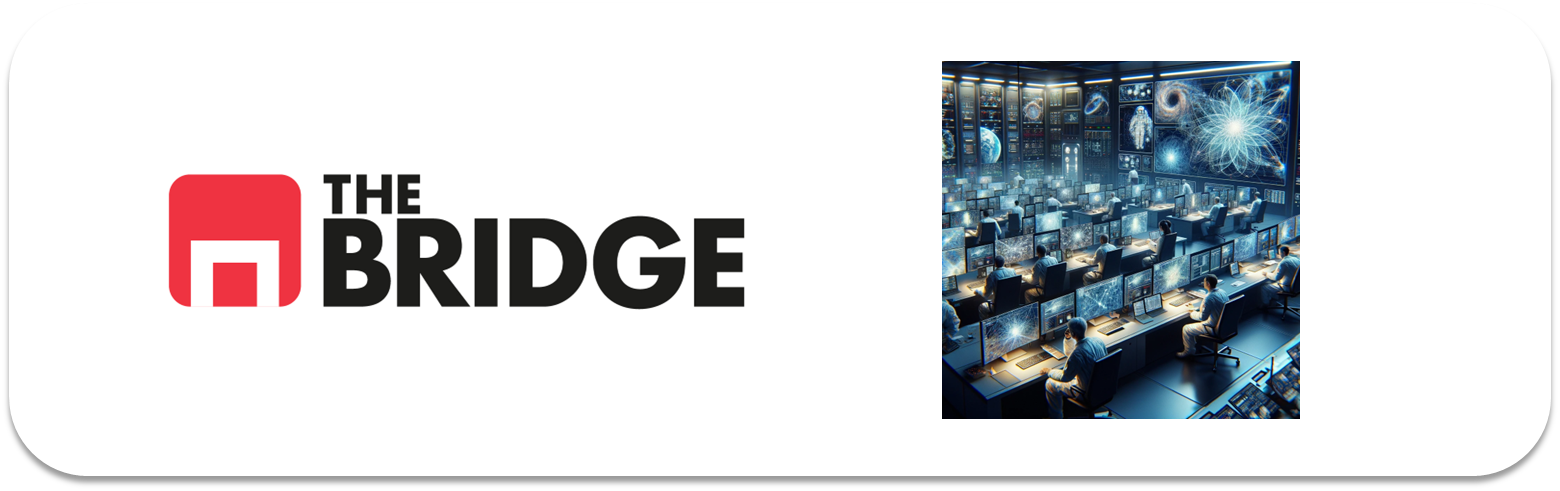

## PRACTICA OBLIGATORIA: **Redes Convolucionales**

* La práctica obligatoria de esta unidad consiste en un ejercicio de construcción de una red convolucional con Keras para la clasificación de imagenes de simpáticos perretes y gatetes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import bootcampviztools as bt
import seaborn as sns

import os
from skimage.io import imread
from sklearn.utils import shuffle
import seaborn as sns
from sklearn.metrics import classification_report, ConfusionMatrixDisplay,confusion_matrix
from sklearn.model_selection import train_test_split
import keras
import cv2

from tensorflow.keras.optimizers import Adam

import warnings
# filter warnings
warnings.filterwarnings('ignore')


### Problema de Negocio y dataset

Una conocida empresa de información inmobiliaria utiliza un CAPTCHA visual de perros y gatos para detectar webscrappings intensivos y ataques de denegación de servicio. Últimamente, ha detectado que su sistema está empezando a flojear, es decir que hay muchos sistemas de detección automática de imágenes que son capaces de detectar que es un perro y un gato y salterse el CAPTCHA antirobots. Por eso nos ha pedido que entrenemos un modelo potente de clasificación que emule a estos sistemas con el objetivo de emplear como fotografías para el CAPTCHA aquellas que no sepa detectar este sistema emulador de chicos malos.  

Pues manos a la obra, tenemos que seleccionar en un conjunto de 1000 imágenes aquellas que peor se le daría clasificar a un potencial sistema anti-CAPTCHA.  

Para ello vamos a emplear un conjunto de train de 4000 imágenes de perretes y gatetes que se encuentran distribuidas en "data" en cuatro directorios "github_train_0",  "github_train_1", "githun_train_2" y "github_train_3". Los datos de las imagenes que tenemos que clasificar y luego seleccionar como las más "difíciles" están en "data" en el directorio "github_test".


### Se pide

1. Crear los datasets X,y de train y test, leyendo las imágenes de los directorios correspondientes (tendrás que leer todas las imágenes de los cuatro directorios para train) y a la vez que se leen adpatar su resolución para que todas tengan un tamaño de 32x32. En este caso puedes adaptar las funciones de los ejercicios de la unidad. NOTA: Ten en cuenta que la clase a la que pertenece en la foto está en el nombre del archivo.

2. Crea un modelo DL basado en redes convolucionales con al menos dos juegos Convolucional-Pooling. Sigue todo el proceso de ML (visualización del dataset, MiniEDA, Construcción del modelo)

3. Entrenar el modelo con un callback de Earlystopping con paciencia la que tengas :-). Muestra su historial de entrenamiento.

4. Evalua el modelo, haz un reporte de clasificacion y muestra la matriz de confianza.

5. Es el momento de seleccionar las imagenes: Selecciona el 10% de imágenes mal clasificadas de una y otra clase que tengan el mayor nivel de confianza de que pertenencían a la clase errónea. Es decir las imágenes de perros clasificadas como gatos y con la probabilidad de ser perror más alta.


### Extra (para hacer en clase)

Repite los pasos 3 a 5 utilizando el generador de imágenes sintéticas o Image Augmentation de Keras. 



1. Crear los datasets X,y de train y test, leyendo las imágenes de los directorios correspondientes (tendrás que leer todas las imágenes de los cuatro directorios para train) y a la vez que se leen adpatar su resolución para que todas tengan un tamaño de 32x32. En este caso puedes adaptar las funciones de los ejercicios de la unidad. NOTA: Ten en cuenta que la clase a la que pertenece en la foto está en el nombre del archivo.

In [29]:
# Descomprimimos el test
import zipfile
path_to_zip_file = "./data/github_test.zip"
directory_to_extract_to = "./data/test_set/"

with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)


In [30]:
# Descomprimimos el train.
for n in range(4):
  path_to_zip_file  = f'./data/github_train_{n}.zip'
  directory_to_extract_to = "./data/train_set/"

  with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)


In [31]:
# Creamos los directorios
ROOT_PATH = './data/'
TRAIN_PATH = ROOT_PATH + "train_set/"
TEST_PATH = ROOT_PATH + "test_set/"

In [32]:
# chequeamos
print(ROOT_PATH,TRAIN_PATH,TEST_PATH)

./data/ ./data/train_set/ ./data/test_set/


In [37]:
# Pegamos la la función de los ejercicios para leer los folders y redimensionar las imágenes

def read_data(directorio, reshape_dim = (32,32)):
    X = []
    y = []
    for folder in os.listdir(directorio):
        print(y)
        if os.path.isdir('/'.join([directorio, folder])):
            for file in os.listdir('/'.join([directorio, folder])):

                image = imread('/'.join([directorio, folder, file]))
                image = cv2.resize(image, reshape_dim) # Redimensionamos las imágenes a 32x32
                label = file.split('.')[0]  # Obtener la parte antes del punto

                X.append(image)
                y.append(label)

    return np.array(X),np.array(y)


In [38]:
# Creamos los X_train, y_train y X_test e y_test
X_train,y_train = read_data(TRAIN_PATH)
X_test, y_test = read_data(TEST_PATH)

[]
['cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'c

2. Crea un modelo DL basado en redes convolucionales con al menos dos juegos Convolucional-Pooling. Sigue todo el proceso de ML (visualización del dataset, MiniEDA, Construcción del modelo)

In [44]:
# Vamos a ver si las dimensiones coinciden con lo que esperamos en el train
print('X train shape: ', X_train.shape)
print('Y train shape: ', y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', y_test.shape)

# Vemos que tenemos en el train 4000 imágenes de 32x32 con tres canales para los colores.
# Y en el test tenemos 1000 imágenes de 32x32 con tres canales para los colores.
# Parece correcto.

X train shape:  (4000, 32, 32, 3)
Y train shape:  (4000,)
X test shape:  (1000, 32, 32, 3)
Y test shape:  (1000,)


In [40]:
# Vamos a pintar una muestra aleatoria de 20 imágenes para ver su aspecto.
# Usamos la función de pintado de otras veces

def show_images_batch(animalitos, names = [], n_cols = 5, size_scale = 2):
    n_rows = ((len(animalitos) - 1) // n_cols + 1)
    plt.figure(figsize=(n_cols * size_scale, n_rows * 1.1*size_scale))
    for index, paisaje in enumerate(animalitos):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(paisaje, cmap = "Greys")
        plt.axis("off")
        if len(names):
            plt.title(names[index])

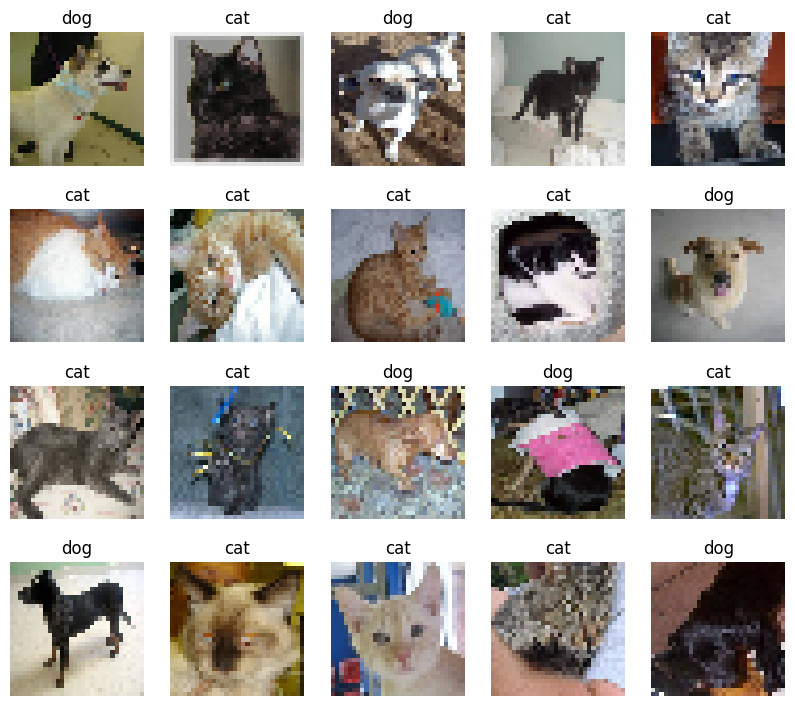

In [41]:
# Usamos el random de numpy para pintar 20 imagenes
indices = np.random.randint(0,len(X_train),20)
show_images_batch(X_train[indices], names = y_train[indices], n_cols = 5)

# Vemos que a simple vista la reducción de la resolución afecta, pero por ahora lo mantenemos para no cargar el tiempo de computación.
# Las labels parece que se han asignado bien a las imágenes.

In [42]:
# Vamos a hacer un miniEda.
targets = pd.Series(y_train)
targets.value_counts(True)

# Vemos que está perffectamente balanceado.

cat    0.5
dog    0.5
Name: proportion, dtype: float64

In [43]:
# Vamos a normalizar porque le sienta bien a las funciones de activación.
# Aplicamos el truco de dividir por el valor máximo de la escala de grises de un píxel (que es cómo tenemos los datos)

65025

In [45]:
X_train = X_train/255
X_test = X_test/255

In [51]:
#Vamos a crear el modelo de DL

# Primero definimos las capas de la red, en este caso partimos de 30 filtros de 3x3, seguido de una capa de pooling de 2x2,
# El input shape es el tamaño de las imágenes de entrada, en nuestro caso 32x32x3.
# El tamaño del kernel es pequeño pero suele ser de este tipo y más con resoluciones tan bajas, el número de filtros igual lo cambiamos.

capas = [keras.layers.Conv2D(filters = 30, kernel_size = (3, 3),
                            input_shape = (X_train[0].shape),
                            padding = "same", # Para que dibuje el padding y pueda poner el kernel en el extremo de los píxeles
                            activation = 'relu'), #Estas siempre se activa con RELU
         keras.layers.MaxPooling2D(pool_size = (2, 2)),

# Añadimos otra capa de convolución y pooling

         keras.layers.Conv2D(filters = 15,
                             kernel_size = (3, 3),
                             padding = "same",
                             activation = 'relu'),
         keras.layers.MaxPooling2D(pool_size = (2, 2)),

# Añadimos una capa de flatten para convertir la salida de la capa de pooling en un vector
         keras.layers.Flatten(),

# Añadimos dos capas densas para la clasificación
         keras.layers.Dense(units = 150, activation = 'relu'),
         keras.layers.Dense(units = 100, activation = 'relu'),

# Añadimos la capa de salida con 1 neurona, que nos dará la probabilidad de pertenencia a una de las dos clases, perro o gato.
         keras.layers.Dense(1, activation = 'sigmoid')]

# Creamos el modelo
model = keras.Sequential(capas)

In [49]:
# veamos la forma del xtrain
print(X_train.shape) # 4000 fotos en train
print(X_train.size)


(4000, 32, 32, 3)
12288000


In [52]:
# Lo vamos a compilar con Adam
model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [53]:
# Veamos la topología del modelo que hemos creado.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 30)     │           840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 15)     │         4,065 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 15)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 960)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 150)            │       144,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        15,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 164,256 (641.62 KB)

 Trainable params: 164,256 (641.62 KB)

 Non-trainable params: 0 (0.00 B)

3. Entrenar el modelo con un callback de Earlystopping con paciencia la que tengas :-). Muestra su historial de entrenamiento.

In [54]:
# Pasamos el target  a ordinal.
mapa = {tipo:indice for indice,tipo in enumerate(targets.unique())} # Rehusando la serie que creamos para ver la distribución del target
mapa


{'cat': 0, 'dog': 1}

In [55]:
# Se lo asignamos al x_train  y_test
y_train_num = np.array([mapa[y] for y in y_train])
y_test_num = np.array([mapa[y] for y in y_test])


In [56]:
# Barajamos los datos para que el modelo no aprenda en orden de las imágenes
X_train, y_train_num = shuffle(X_train, y_train_num)

In [57]:
# Instanciamos el entrenamiento para luego ver la variable "history"

history = model.fit(X_train,
                    y_train_num,
                    validation_split = 0.2,
                    epochs = 100,
                    batch_size = 32, callbacks= [keras.callbacks.EarlyStopping(patience = 10, restore_best_weights= True)]) 

# Queremos recuperar los pesos de la mejor de las epocas durante el periodo de patience



Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5180 - loss: 0.6926 - val_accuracy: 0.5325 - val_loss: 0.6890
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6168 - loss: 0.6533 - val_accuracy: 0.6625 - val_loss: 0.6125
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6999 - loss: 0.5721 - val_accuracy: 0.6938 - val_loss: 0.5889
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7323 - loss: 0.5271 - val_accuracy: 0.6187 - val_loss: 0.6788
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7515 - loss: 0.5131 - val_accuracy: 0.6562 - val_loss: 0.6394
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7793 - loss: 0.4651 - val_accuracy: 0.7113 - val_loss: 0.5730
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7971 - loss: 0.4306 - val_accuracy: 0.6775 - val_loss: 0.6623
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8286 - loss: 0.3855 - 

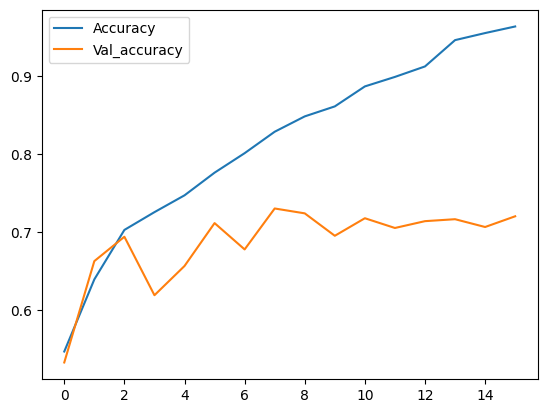

In [58]:
# Representamos el objeto history
history_df = pd.DataFrame(history.history)
plt.plot(history_df['accuracy'], label = 'Accuracy')
plt.plot(history_df['val_accuracy'], label = 'Val_accuracy')

plt.legend();

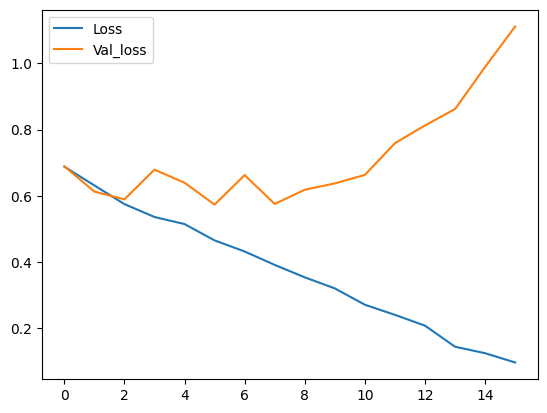

In [59]:
# Veamos la evolución de la pérdida
plt.plot(history_df['loss'], label = 'Loss')
plt.plot(history_df['val_loss'], label = 'Val_loss')

plt.legend();

*En ambas figuras se ve que pasadas las primeras 5 épocas, sólo estamos consiguiendo es hacer overfitting y más superadas las 10 épocas en la que incluso sube el error de validación y el de train sigue bajando*


4. Evalua el modelo, haz un reporte de clasificacion y muestra la matriz de confianza.

In [60]:
model.evaluate(X_test, y_test_num)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7413 - loss: 0.5278


[0.5660732984542847, 0.7229999899864197]

Nos da un 74% de accuracy

In [63]:
# Montamos el reporte.
# Como la salida es binaria, vamos a usar comparar la probabilidad con el 0.5
predictions = model.predict(X_test)
y_pred = [1 if pred >= 0.5 else 0 for pred in predictions]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [64]:
inverse_map = {valor:clave for clave,valor in mapa.items()}
y_test_labels = [inverse_map[y] for y in y_test_num]
y_pred_labels = [inverse_map[y] for y in y_pred]
print(classification_report(y_test_labels, y_pred_labels))

              precision    recall  f1-score   support

         cat       0.71      0.75      0.73       500
         dog       0.74      0.70      0.72       500

    accuracy                           0.72      1000
   macro avg       0.72      0.72      0.72      1000
weighted avg       0.72      0.72      0.72      1000



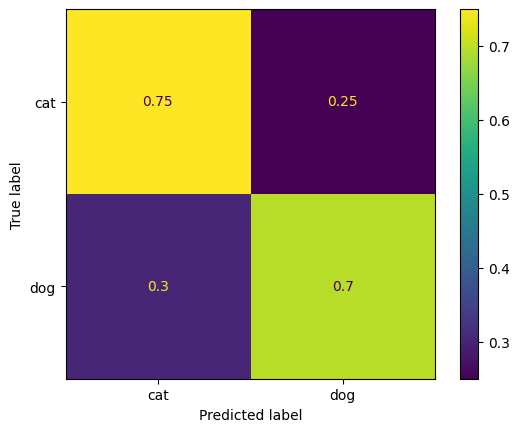

In [65]:
ConfusionMatrixDisplay.from_predictions(y_test_labels, y_pred_labels, normalize="true")

# Vemos que se equivoca algo más al clasificar a los perros, tiene un 5% menos de errores.


5. Es el momento de seleccionar las imagenes: Selecciona el 10% de imágenes mal clasificadas de una y otra clase que tengan el mayor nivel de confianza de que pertenencían a la clase errónea. Es decir las imágenes de perros clasificadas como gatos y con la probabilidad de ser perror más alta.

In [66]:
confianza = [prediction.max() for prediction in model.predict(X_test)]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [68]:
pred_df = pd.DataFrame({"True": y_test_labels, "Predicted": y_pred_labels, "Confianza": confianza})

In [75]:
error = pred_df["True"] != pred_df["Predicted"]
errores = pred_df[error].sort_values("Confianza", ascending = False)
errores

,True,Predicted,Confianza
337,cat,dog,0.997318
229,cat,dog,0.993157
344,cat,dog,0.953387
175,cat,dog,0.943512
242,cat,dog,0.937609
...,...,...,...
537,dog,cat,0.048292
662,dog,cat,0.040775
772,dog,cat,0.039947
603,dog,cat,0.018211


In [72]:

# Calculamos  el número de filas que representan el 10% del DataFrame
n = int(len(errores) * 0.1)
n


27

In [78]:
# Seleccionar el 10% de los datos con los valores más bajos en la columna 'B'
lowest_10_percent = errores.nlargest(n, 'Confianza')
print(lowest_10_percent)

    True Predicted  Confianza
337  cat       dog   0.997318
229  cat       dog   0.993157
344  cat       dog   0.953387
175  cat       dog   0.943512
242  cat       dog   0.937609
284  cat       dog   0.915271
394  cat       dog   0.913032
359  cat       dog   0.909242
368  cat       dog   0.906953
246  cat       dog   0.901466
286  cat       dog   0.898776
494  cat       dog   0.898465
420  cat       dog   0.892663
83   cat       dog   0.857575
4    cat       dog   0.848928
343  cat       dog   0.846414
455  cat       dog   0.846082
266  cat       dog   0.837869
218  cat       dog   0.832611
10   cat       dog   0.829079
145  cat       dog   0.823890
153  cat       dog   0.822584
435  cat       dog   0.822211
214  cat       dog   0.820405
440  cat       dog   0.813011
90   cat       dog   0.808579
107  cat       dog   0.807550


In [89]:
# Vamos a representar algunos de los animales donde el modelo comete errores.
for true_label, predicted_label in errores.iloc[10:20,0:2].values:
    print(true_label, predicted_label)

cat dog
cat dog
cat dog
cat dog
cat dog
cat dog
cat dog
cat dog
cat dog
cat dog


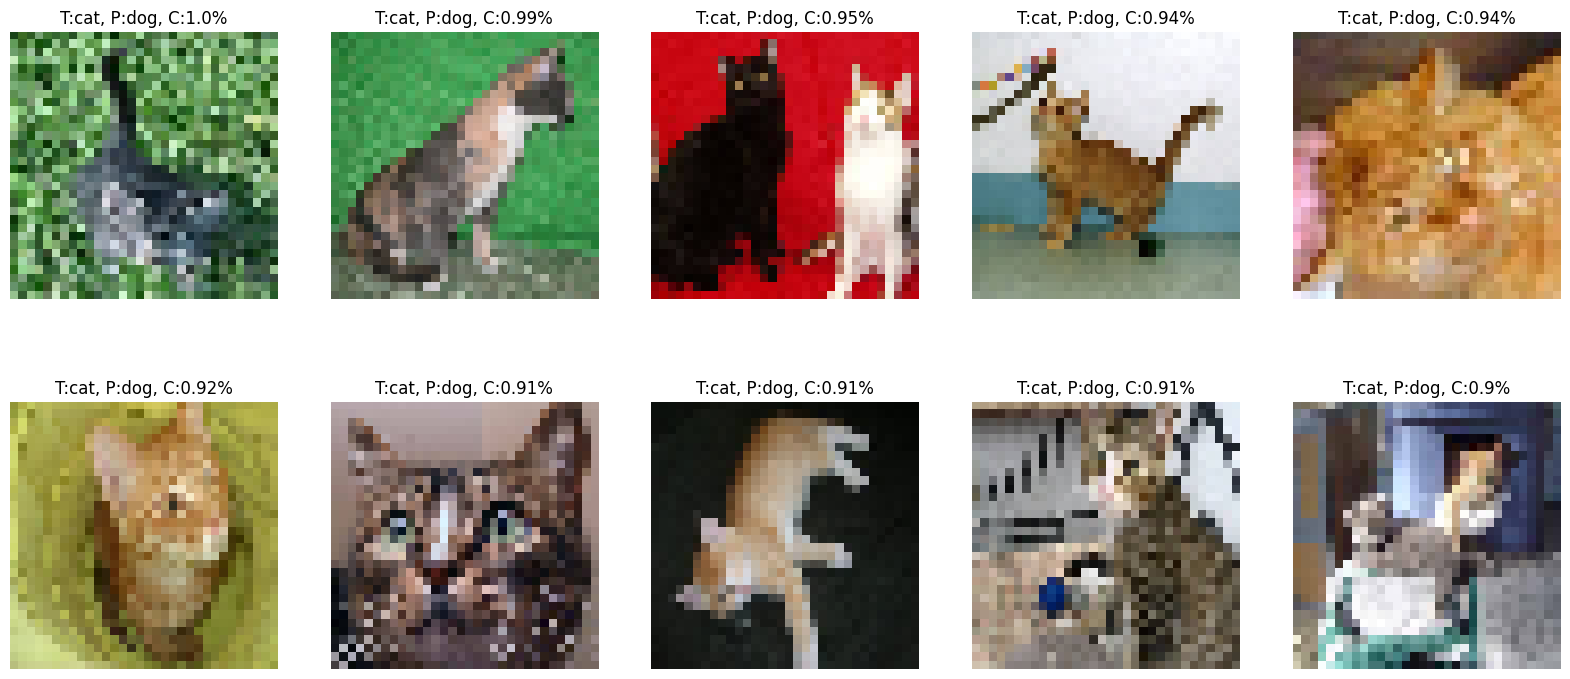

In [90]:
show_images_batch(X_test[errores.iloc[0:10].index],names= [f"T:{val1}, P:{val2}, C:{round(val3,2)}%" for val1,val2,val3 in errores.iloc[0:10].values], size_scale= 4)